In [129]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [130]:
movies = pd.read_csv('movies.csv')

In [131]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [132]:
#Checking nulls

for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.00757193336698637%
genre - 0.0%
year - 0.0%
released - 0.0003365303718660609%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0005047955577990914%
star - 0.0003365303718660609%
country - 0.0005047955577990914%
budget - 0.2905939761063436%
gross - 0.0292781423523473%
company - 0.002187447417129396%
runtime - 0.0005047955577990914%


In [133]:
#Dropping and re-checking nulls

movies = movies.dropna(axis=0)

for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [134]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4153 entries, 0 to 5941
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      4153 non-null   object 
 1   rating    4153 non-null   object 
 2   genre     4153 non-null   object 
 3   year      4153 non-null   int64  
 4   released  4153 non-null   object 
 5   score     4153 non-null   float64
 6   votes     4153 non-null   float64
 7   director  4153 non-null   object 
 8   writer    4153 non-null   object 
 9   star      4153 non-null   object 
 10  country   4153 non-null   object 
 11  budget    4153 non-null   float64
 12  gross     4153 non-null   float64
 13  company   4153 non-null   object 
 14  runtime   4153 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 519.1+ KB


In [135]:
movies.describe()

,year,score,votes,budget,gross,runtime
count,4153.000000,4153.000000,4.153000e+03,4.153000e+03,4.153000e+03,4153.000000
mean,1997.567060,6.360029,1.040194e+05,3.170587e+07,8.143356e+07,107.459186
std,8.460687,0.986987,1.833466e+05,3.451978e+07,1.450793e+08,18.316931
min,1980.000000,1.900000,2.080000e+02,6.000000e+03,3.090000e+02,69.000000
25%,1991.000000,5.800000,1.400000e+04,1.000000e+07,9.171289e+06,95.000000
50%,1998.000000,6.400000,4.300000e+04,2.000000e+07,2.961214e+07,104.000000
75%,2005.000000,7.000000,1.120000e+05,4.000000e+07,9.175320e+07,117.000000
max,2011.000000,9.300000,2.400000e+06,3.000000e+08,2.847246e+09,271.000000


In [136]:
#Create correct year column

movies['yearcorrect'] = movies['released'].str.extract(r'(\d{4})')

In [137]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [139]:
#Sorting by Gross rev

movies.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
5845,Harry Potter and the Deathly Hallows: Part 2,PG-13,Adventure,2011,"July 15, 2011 (United States)",8.1,790000.0,David Yates,Steve Kloves,Daniel Radcliffe,United Kingdom,125000000.0,1.342322e+09,Warner Bros.,130.0,2011
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1.146031e+09,New Line Cinema,201.0,2003
5878,Transformers: Dark of the Moon,PG-13,Action,2011,"June 29, 2011 (United States)",6.2,390000.0,Michael Bay,Ehren Kruger,Shia LaBeouf,United States,195000000.0,1.123794e+09,Paramount Pictures,154.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0,1982


In [141]:
#Drop duplicates (if any)

movies.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


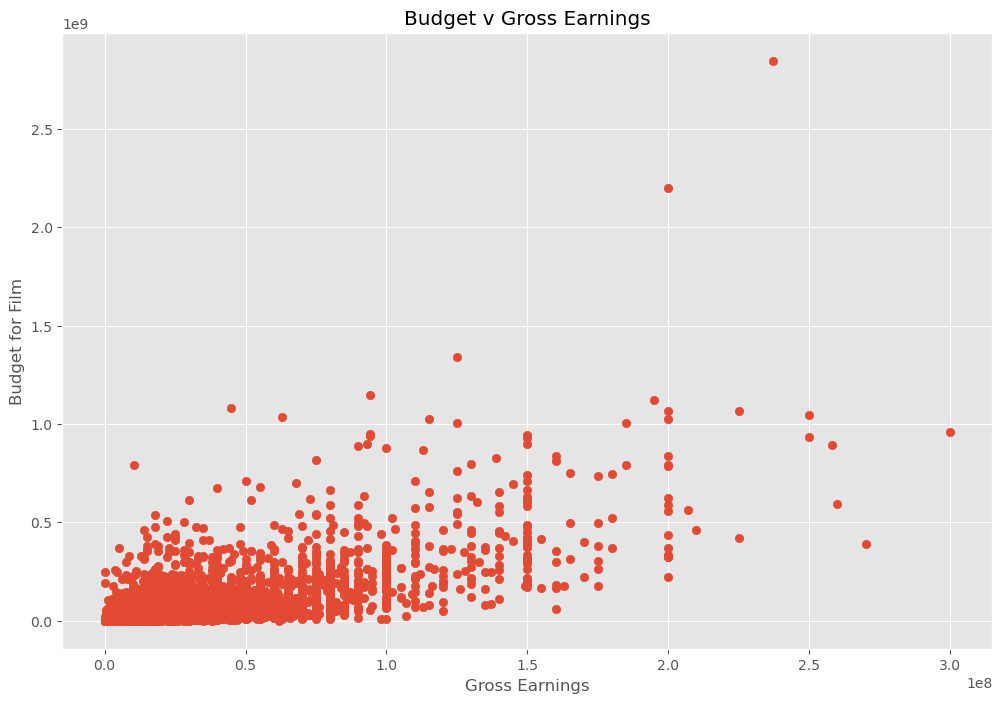

In [142]:
# Scatter Plot with Budget and Gross

plt.scatter(x=movies['budget'],y=movies['gross'])

plt.title('Budget v Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

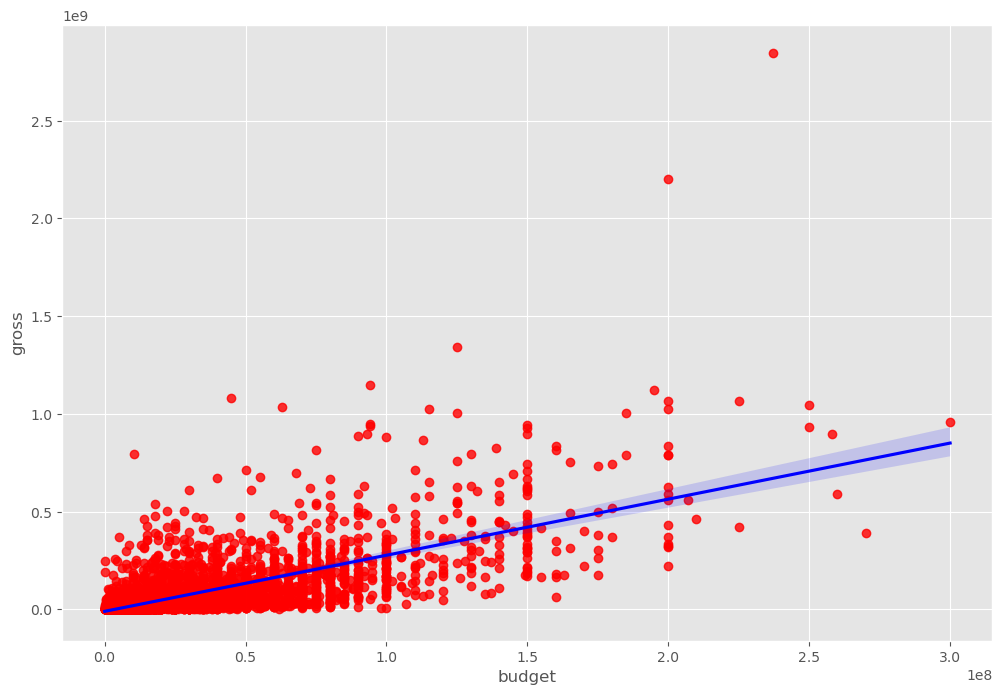

In [143]:
#Budget v Gross using Seaborn

sns.regplot(x='budget',y='gross',data=movies, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [144]:
#Correlation -- can use pearson, kendall, spearman

movies.corr()

/var/folders/p1/pbj79r650x59h2qrchrzb2140000gn/T/ipykernel_50802/1479893298.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.018791,0.218558,0.371338,0.245698,0.033116
score,0.018791,1.000000,0.460494,0.028394,0.213254,0.407447
votes,0.218558,0.460494,1.000000,0.398453,0.633643,0.313875
budget,0.371338,0.028394,0.398453,1.000000,0.682494,0.288724
gross,0.245698,0.213254,0.633643,0.682494,1.000000,0.256474
runtime,0.033116,0.407447,0.313875,0.288724,0.256474,1.000000


/var/folders/p1/pbj79r650x59h2qrchrzb2140000gn/T/ipykernel_50802/1576267651.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = movies.corr()


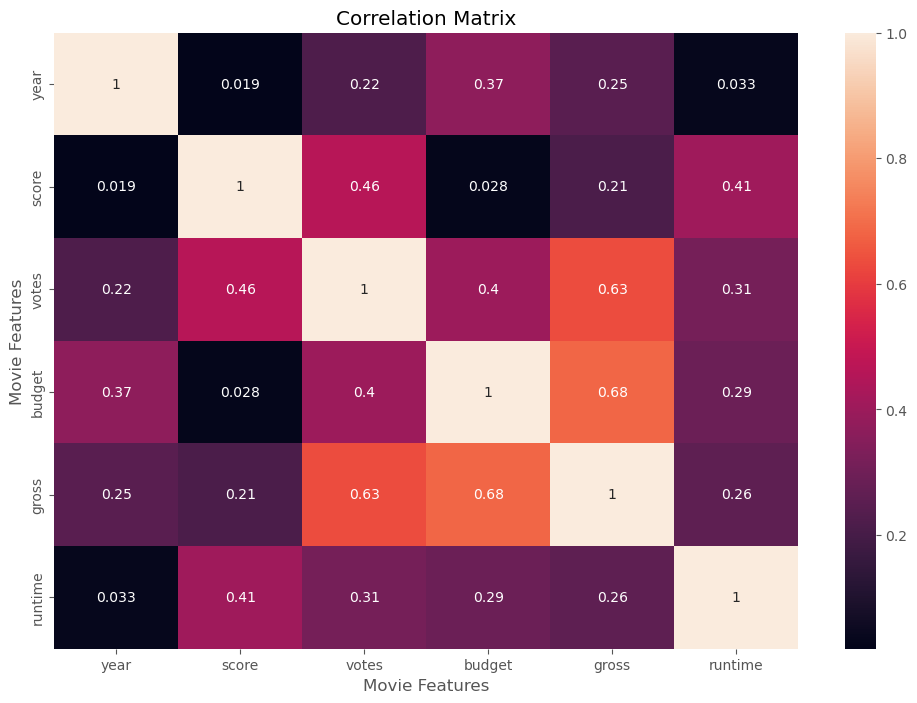

In [145]:
correlation_matrix = movies.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [146]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [148]:
#Change categorical to numerical for correlation analysis

movies_numerical = movies

for col_name in movies_numerical.columns:
    if(movies_numerical[col_name].dtype == 'object'):
        movies_numerical[col_name]=movies_numerical[col_name].astype('category')
        movies_numerical[col_name]=movies_numerical[col_name].cat.codes
        
movies_numerical.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,3620,6,6,1980,1002,8.4,927000.0,1431,2305,561,37,19000000.0,46998772.0,1073,146.0,0
1,3060,6,1,1980,864,5.8,65000.0,1252,939,155,38,4500000.0,58853106.0,328,104.0,0
2,2836,4,0,1980,1044,8.7,1200000.0,590,1472,925,38,18000000.0,538375067.0,710,124.0,0
3,148,4,4,1980,864,7.7,221000.0,691,1145,1189,38,3500000.0,83453539.0,838,88.0,0
4,556,6,4,1980,900,7.3,108000.0,558,276,206,38,6000000.0,39846344.0,818,98.0,0


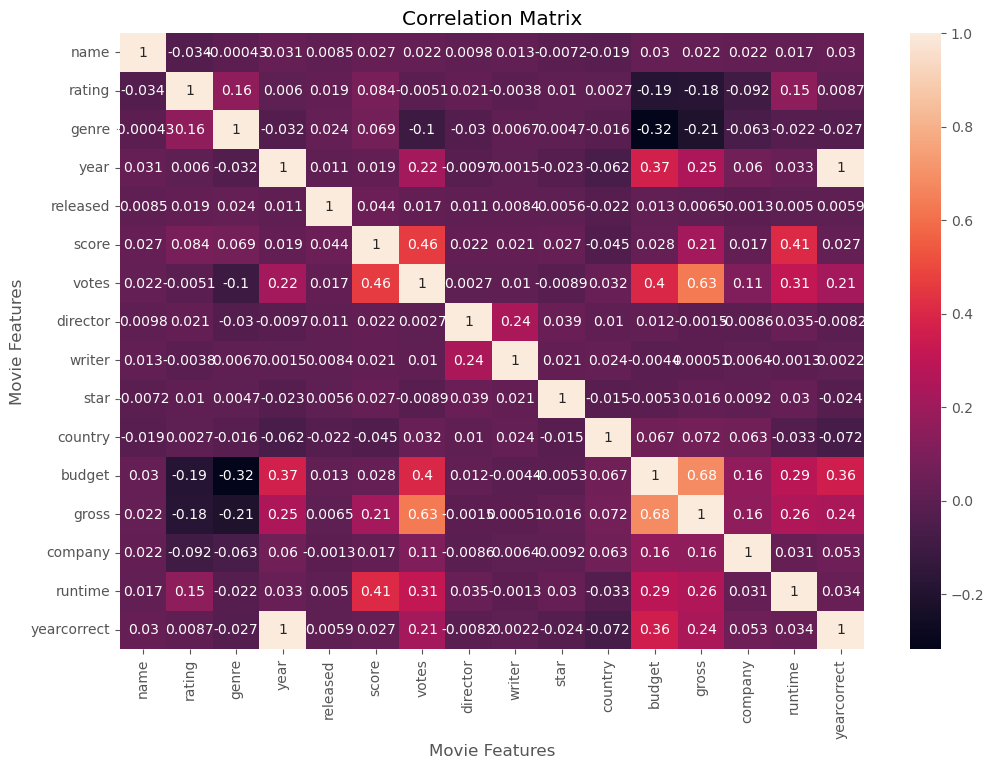

In [149]:
correlation_matrix = movies_numerical.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [151]:
correlation_mat = movies_numerical.corr()

In [152]:
correlation_mat = movies_numerical.corr()
corr_pairs = correlation_mat.unstack()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(corr_pairs)

name         name           1.000000
             rating        -0.034089
             genre         -0.000432
             year           0.030530
             released       0.008508
             score          0.027309
             votes          0.022465
             director       0.009807
             writer         0.013114
             star          -0.007180
             country       -0.018681
             budget         0.030224
             gross          0.022243
             company        0.021874
             runtime        0.016574
             yearcorrect    0.030203
rating       name          -0.034089
             rating         1.000000
             genre          0.156004
             year           0.005974
             released       0.019025
             score          0.084009
             votes         -0.005055
             director       0.020558
             writer        -0.003781
             star           0.010477
             country        0.002704
 

In [153]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.317683
genre        budget        -0.317683
             gross         -0.209872
gross        genre         -0.209872
budget       rating        -0.187073
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [154]:
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1.0)]
high_corr

gross        votes          0.633643
votes        gross          0.633643
budget       gross          0.682494
gross        budget         0.682494
year         yearcorrect    0.997787
yearcorrect  year           0.997787
dtype: float64

In [155]:
#Votes and budget have highest correlation to gross earnings